<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Delitos en Estados Unidos </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/crimenesUSA.png" align="middle" style="width:550px;"/></td>
<td>
    
En este proyecto se analizaran datos de arrestos en Estados Unidos en el año 1973 por cada 100,000 habitantes. También proporciona el porcentaje de la población que vive en áreas urbanas dentro del estado.    

Las variables del archivo de datos son:
    
'US_state'  :  Entidad de Estados Unidos
    
'UrbanPop' : Porcentaje de población urbana
    
'Murder' : Asesinato
    
'Assault' : Asalto 
    
'Rape' :   Abuso   

    
<br>
</td>
</tr>
</table>

# 1. Importar librerías generales

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

# 2. Obtención de datos

In [2]:
# Ubicación de los datos en github
#url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv'
#df = pd.read_csv(url)

df = pd.read_csv('datos/USArrests.csv') 

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#renombramos la primera columna
df = df.rename(columns={'Unnamed: 0': 'US_state'})

In [5]:
df = df[['US_state', 'UrbanPop', 'Murder', 'Assault','Rape']]

In [6]:
df.head()

,US_state,UrbanPop,Murder,Assault,Rape
0,Alabama,58,13.2,236,21.2
1,Alaska,48,10.0,263,44.5
2,Arizona,80,8.1,294,31.0
3,Arkansas,50,8.8,190,19.5
4,California,91,9.0,276,40.6


# 3. Análisis Exploratorio

In [7]:
#Principales parámetros estadísticos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


/home/manuel/.pyenv/versions/3.11.4/envs/DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


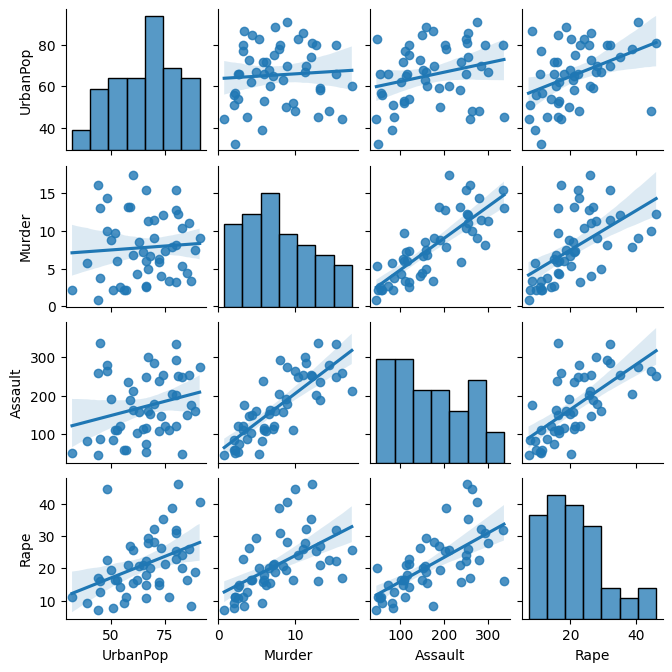

In [8]:
# Correlación lineal de variables
sns.pairplot(df, kind="reg",  height=1.7 , aspect=1)

# 4. Normalización de datos

In [9]:
#Selección de caracteristicas para llevar a cabo el agrupamiento
features = ['Murder','Assault','UrbanPop','Rape']

In [10]:
#Re-esalamiento de variables
from sklearn import preprocessing
df_standardized = preprocessing.scale(df[features])

In [11]:
df_standardized 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

(array([5., 8., 5., 9., 6., 3., 5., 4., 3., 2.]),
 array([-1.62069341, -1.23569755, -0.85070169, -0.46570583, -0.08070998,
         0.30428588,  0.68928174,  1.0742776 ,  1.45927346,  1.84426932,
         2.22926518]),
 <BarContainer object of 10 artists>)

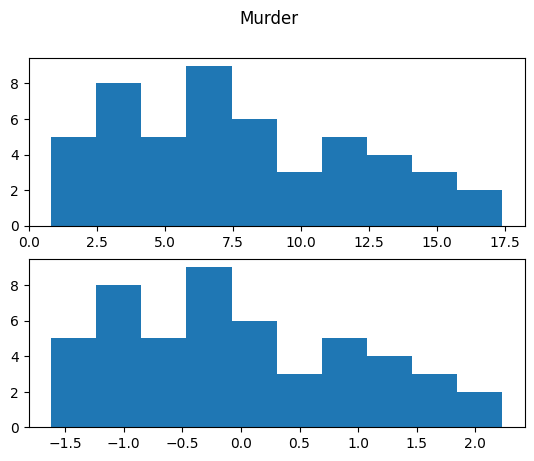

In [12]:
#Comparación antes y despues de la normalización (re-escalamiento)
Murder_list=df_standardized[:,:1].flatten()
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Murder')
ax1.hist(df['Murder'])
ax2.hist( Murder_list)

In [13]:
# Data frame que servirá para la predicción de grupos
df_standardized = pd.DataFrame(df_standardized)

In [14]:
df_standardized.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# 5. Separación de los datos en grupos

In [15]:
# Llamamos al algoritmo y lo ejecutamos  para 1 cluster
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 1, init = 'k-means++', random_state = 42, n_init='auto')
kmeans.fit(df_standardized)
# Valor de WCSS
kmeans.inertia_

200.0

# 6. Método del codo

In [16]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(df_standardized)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[200.0,
 104.96163315756871,
 83.25845759512647,
 57.67285241283121,
 51.58077513078224,
 45.87909041715907,
 41.65663356144605,
 37.678520169665276,
 33.3823091339961,
 29.62271466441502,
 27.571666995032174,
 24.518816359444358]

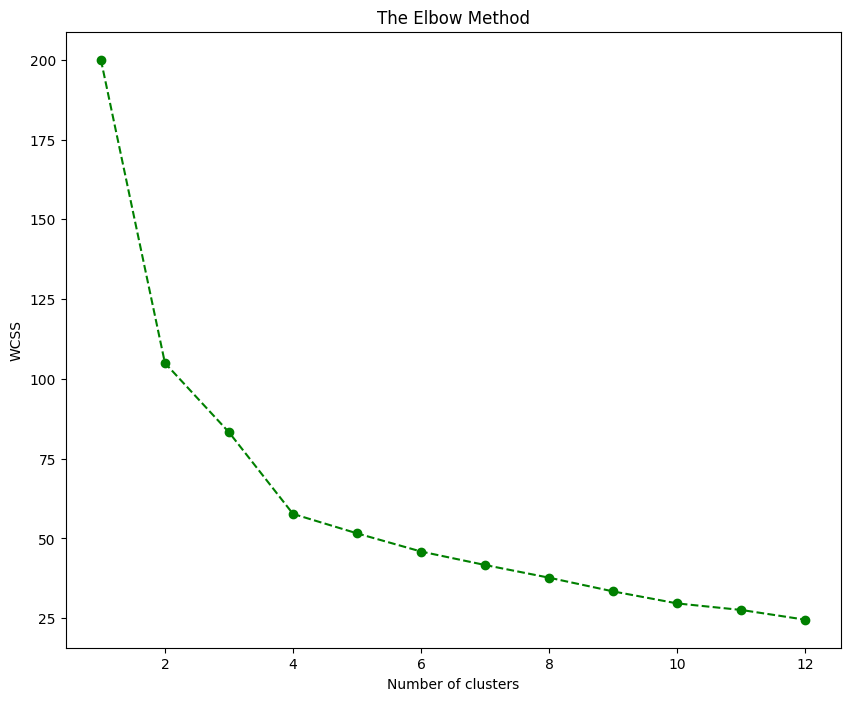

In [18]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 6.1 Método Silhouette

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
# Hallar los labels
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init='auto')
kmeans_labels = kmeans.fit_predict(df_standardized)
kmeans_labels

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [21]:
# Se pude hacer también
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init='auto')
kmeans.fit(df_standardized)
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [22]:
# Son iguales
kmeans_labels == kmeans.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [23]:
# silhouette score
silhouette_score(df_standardized,  kmeans.labels_)

0.3441080718209351

In [24]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=42, init='k-means++', n_init='auto').fit(df_standardized) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(df_standardized, model.labels_, random_state=42)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.40848903, 0.36682843, 0.34410807, 0.30829576, 0.27451834,
       0.25456319, 0.25206032, 0.251828  , 0.25794789, 0.25332995,
       0.24744696])

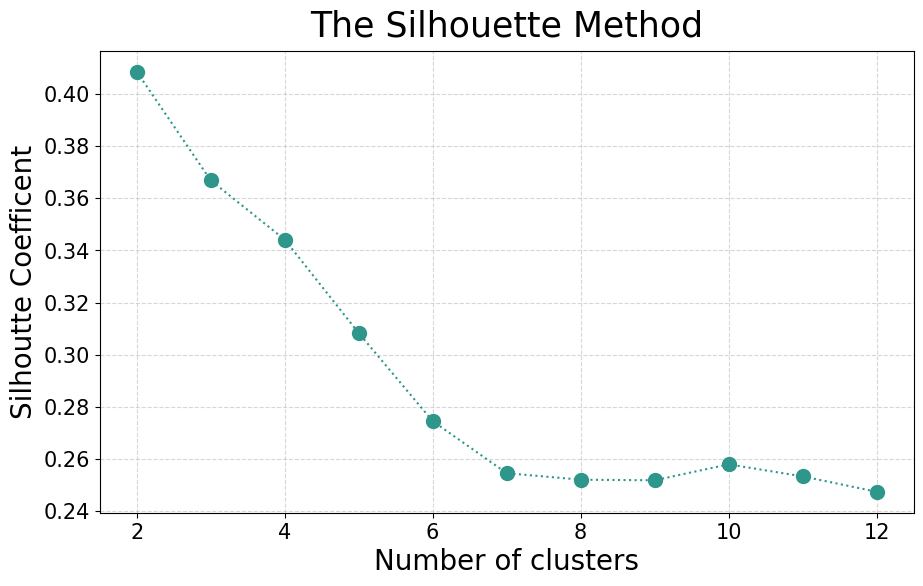

In [25]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [26]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.4084890326217641
El número óptimo de clusters es: 2


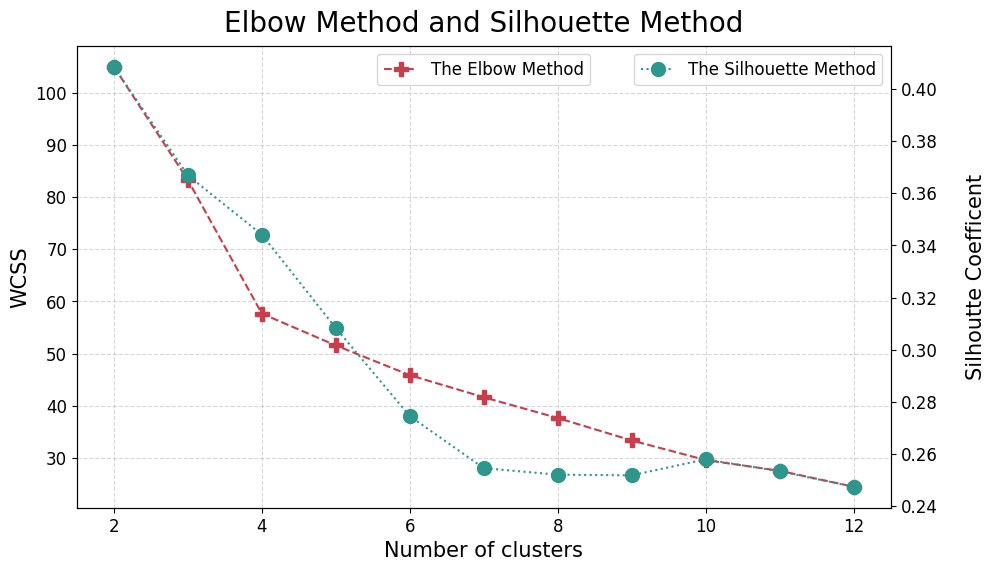

In [27]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()


Se observa que con el método Silhouette se tiene un máximo con dos clusters, sin embargo, con el método Elbow todavía se observa un cambio grande con los mismos dos clusters. Con 4 clusters se tiene un cambio parecido a que con 5 cluster en el método Elbow, además de que tiene una mayor calificación Silhouette que los 5 clusters. Se concluye, entonces, que el número de cluster óptimo es 4.

# 7. Análisis de resultados

In [28]:
# Predicción de etiquetas
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42, n_init='auto')
y_kmeans = kmeans.fit_predict(df_standardized)
y_kmeans

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [29]:
# Cambiamos los valores de los grupos para comenzar en 1 y lo agregamos al dataframe original
df['cluster'] = y_kmeans + 1
df.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,3
2,Arizona,80,8.1,294,31.0,3
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,3


<Axes: xlabel='Murder', ylabel='Assault'>

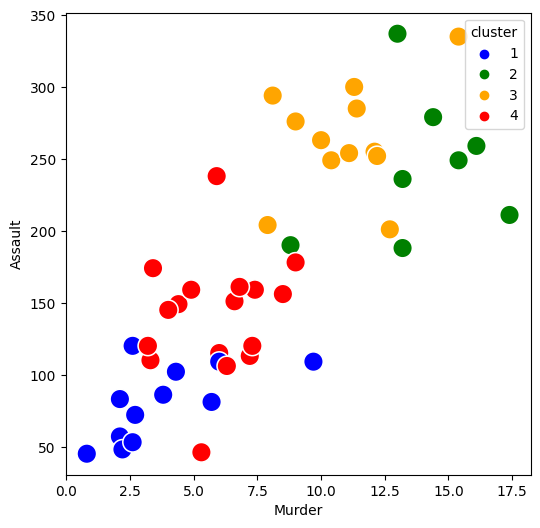

In [30]:
# Observamos la distribución de grupos en un par de variables
plt.figure(figsize=(6,6))
sns.scatterplot(x='Murder', y = 'Assault', hue='cluster',  
                palette=['blue','green','orange','red'] , data=df, s=200)

/home/manuel/.pyenv/versions/3.11.4/envs/DS/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

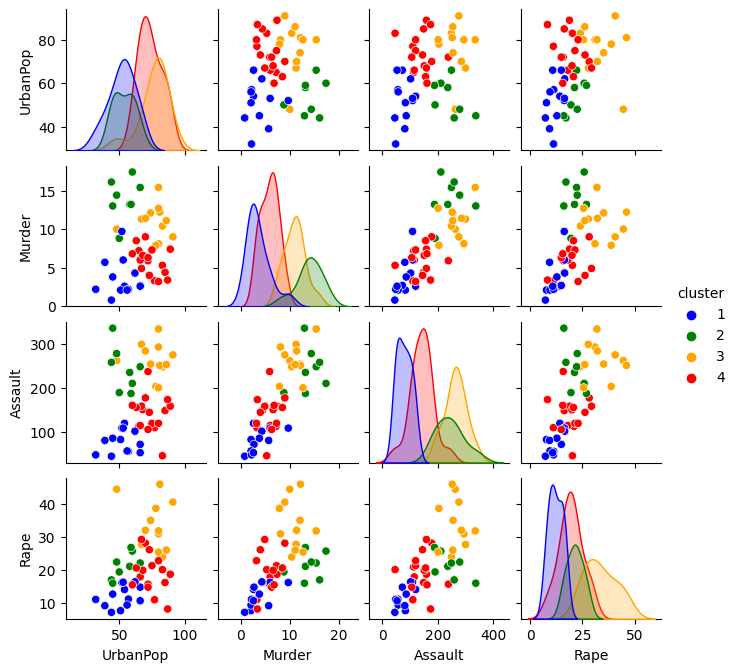

In [31]:
#Comparando a pares las variables
fig = plt.figure(figsize=(5, 5))
sns.pairplot(df, hue="cluster",  palette=['blue','green','orange','red'],height=1.7 , aspect=1)
plt.show()

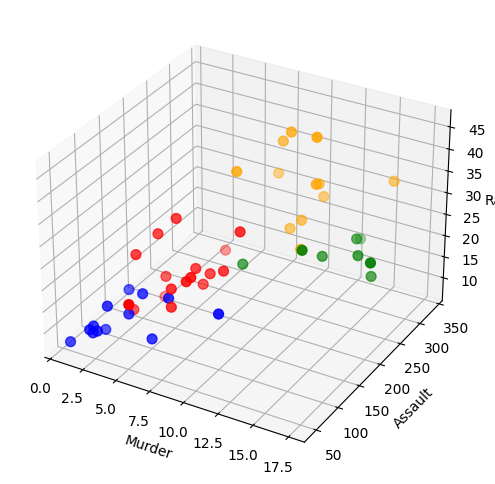

In [32]:
#Comparando los tres tipos de delitos

#%matplotlib notebook
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors

fig = plt.figure(figsize=(8, 6))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['Murder']
y = df['Assault']
z = df['Rape']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(['blue','green','orange','red'])
g=ax.scatter(x, y, z, s=50,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')

legend = ax.legend(*g.legend_elements(), loc="lower center", title="Cluster", borderaxespad=-10, ncol=4)
ax.add_artist(legend)
#ax.view_init(elev=20, azim=35, roll=0)


plt.show()

In [33]:
# Se define un dataframe para mostrar la informacion en un mapa
df_map  = df
df_map.head()

,US_state,UrbanPop,Murder,Assault,Rape,cluster
0,Alabama,58,13.2,236,21.2,2
1,Alaska,48,10.0,263,44.5,3
2,Arizona,80,8.1,294,31.0,3
3,Arkansas,50,8.8,190,19.5,2
4,California,91,9.0,276,40.6,3


In [34]:
# Información geográfica de los Estados Unidos
estados_geo = 'datos/estados_usa.json'

In [35]:
# Librería Python que permite crear mapas interactivos 
import folium
map = folium.Map(location=[53,-102], tiles='cartodbpositron',zoom_start=2.5)

In [36]:
folium.Choropleth(geo_data=estados_geo, data=df_map, # geo_path=country_geo, data=plot_data,
             columns=['US_state', 'cluster'],
             key_on='feature.properties.name',
             fill_color='Paired', fill_opacity=0.9, line_opacity=0.9
                 ).add_to(map)
map

## Observaciones

<img src="figuras/analisis_datos.jpg" align="middle" style="width:850px;"/></td>

Grupo 1(azul): La región del Sureste  los asesinatos tienen altos índices de asesinatos.

Grupo 2(verde): Se encuentra en el Centro y tiene valores promedio. 

Grupo 3(anaranjado-rosa): Se encuentra al Norte y se destaca por la tasa mínima de delitos.

Grupo 4(rojo): Los estados del Suroeste  tienen los mas altos índices de asaltos y violaciones.

